# Assignment 1

Due to the small amounts of data, and as a data scientist, I am going to say that the data which the conclusions are based on is statistically not enough. However, for the sake of the assignment, I am going to draw conclusions based on the data.

In [209]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [210]:
df = pd.read_csv('dataset.csv')
df = df[df['Cousins'].apply(lambda x: x.isnumeric())]
df = df[df['Cousins'].apply(lambda x: int(x) >= 0 and int(x) <= 100)]
df['Cousins'] = df['Cousins'].astype(int)
df.head()

,Timestamp,Fontys approval,Study profile,Most interesting aspect,Effort,Age,Height,Starsign,Continent,Cousins,Unnamed: 10,Spicy food approval
0,9/1/2017 12:19:47,NaN,Software Engineering,(web) programming,10,21,420.69,Leo,Europe,7,Option 1,No
1,9/1/2017 12:22:32,NaN,Software Engineering,exploring/analysing,8,19,178.00,Cancer,Europe,0,Option 1,neutral
2,9/1/2017 12:23:13,NaN,Technology,designing and storytelling,7,20,182.00,Scorpio,Europe,12,Option 1,neutral
3,9/1/2017 12:23:21,NaN,Software Engineering,(web) programming,8,21,197.00,Cancer,Europe,19,Option 1,neutral
4,9/1/2017 12:26:08,NaN,Mathematics,designing and storytelling,8,23,183.00,Aquarius,Europe,27,NaN,Yes


## 2. Reproudcible research

### Are older students taller?

Based on the chart below, I would say that most of the students at Fontys are well within the margin of errors. I would say that older students are just as tall as younger students. I ignored the two outliers, but I didn't want to remove their answers.

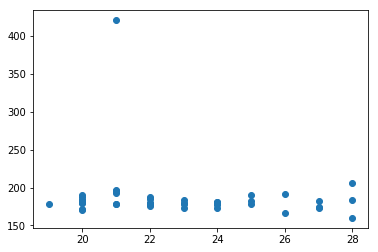

In [211]:
plt.scatter(df['Age'], df['Height'])
plt.show()

### Do Europeans have smaller families?

Based on the figures, European families are smaller. However, there were only two non-European students who filled in a logical numerical answer, which makes the answer inconclusive.

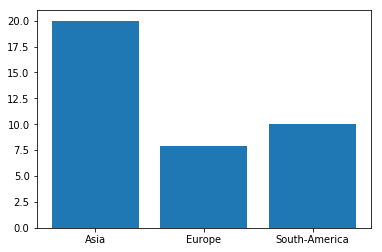

               Timestamp  Fontys approval  Study profile  \
Continent                                                  
Asia                   1                0              1   
Europe                41                0             41   
South-America          1                0              1   

               Most interesting aspect  Effort  Age  Height  Starsign  \
Continent                                                               
Asia                                 1       1    1       1         1   
Europe                              41      41   41      41        41   
South-America                        1       1    1       1         1   

               Cousins  Unnamed: 10  Spicy food approval  
Continent                                                 
Asia                 1            0                    1  
Europe              41            8                   41  
South-America        1            1                    1  


In [212]:
df1 = df.groupby('Continent').mean()

x = np.arange(len(df1.index.values))
y = df1['Cousins']

plt.bar(x, y)
plt.xticks(x, df1.index.values)
plt.show()

print(df.groupby('Continent').count())

### Is there any correlation between star sign and work energy?

As seen in the chart below: no.

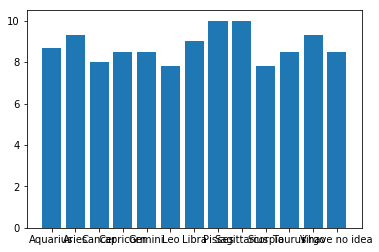

                Timestamp  Fontys approval  Study profile  \
Starsign                                                    
Aquarius                3                0              3   
Aries                   3                0              3   
Cancer                  2                0              2   
Capricorn               2                0              2   
Gemini                  2                0              2   
Leo                     5                0              5   
Libra                   3                0              3   
Pisces                  1                0              1   
Sagittarius             1                0              1   
Scorpio                 6                0              6   
Taurus                  4                0              4   
Virgo                   3                0              3   
i have no idea          8                0              8   

                Most interesting aspect  Effort  Age  Height  Continent  \
Starsign 

In [213]:
df1 = df.groupby('Starsign').mean()

x = np.arange(len(df1.index.values))
y = df1['Effort']

plt.bar(x, y)
plt.xticks(x, df1.index.values)
plt.show()

print(df.groupby('Starsign').count())

### Which is the most creative star sign?

The data provided is insufficient to plot this.

### Find a way to show the study profile, investment in DV and age, all-in one chart.

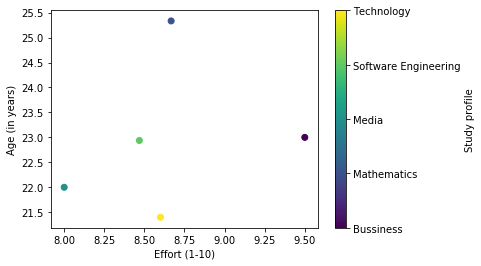

In [214]:
df1 = df.groupby('Study profile').mean()

colors, color_names = pd.factorize(df1.index.values)

fig = plt.figure()
plt.scatter(df1['Effort'], df1['Age'], c=colors)
plt.xlabel('Effort (1-10)')
plt.ylabel('Age (in years)')

cb = plt.colorbar(label='Study profile', ticks=colors)
cb.ax.set_yticklabels(color_names)

plt.show()

## 3. Attribute types

The attribute types of the `group` set are:

* String
* String 
* Enum
* Integer
* Integer
* Number
* Enum
* Enum
* Boolean

The attribute types of the `cities` set are:

* Enum
* String
* String
* String
* Number
* Number
* Number

The attribute types of my own data set are:

* Integer
* String
* Integer
* List
  * Integer
  * Integer
  * Integer
  * Integer
  * Integer
  * Integer
  * Integer

## 4. Scatter matrix and parallel coordinates

### Scatter matrix
A scatter plot displays the correlation between a pair of variables. Given a set of n variables, there are n-choose-2 pairs of variables, and thus the same numbers of scatter plots. These scatter plots can be organized into a matrix, making it easy to look at all pairwise correlations in one place.

### Parallel coordinates
Parallel coordinates are a common way of visualizing high-dimensional geometry and analyzing multivariate data.

To show a set of points in an n-dimensional space, a backdrop is drawn consisting of n parallel lines, typically vertical and equally spaced. A point in n-dimensional space is represented as a polyline with vertices on the parallel axes; the position of the vertex on the i-th axis corresponds to the i-th coordinate of the point.

/usr/lib/python3.6/site-packages/ipykernel/__main__.py:8: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.


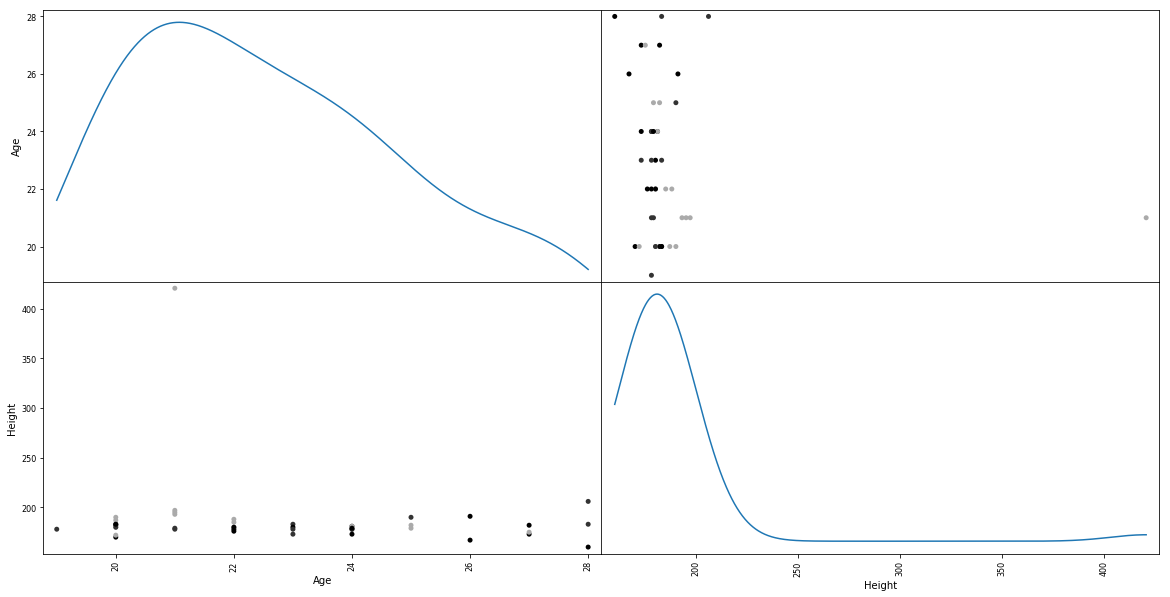

In [215]:
# Scatter matrix
from pandas.tools.plotting import scatter_matrix

df1 = pd.DataFrame()
df1['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df1['Height'] = pd.to_numeric(df['Height'], errors='coerce')

scatter_matrix(df1, alpha=1, figsize=(20, 10), diagonal='kde', c=['#aaaaaa','#333333','#000000'], s=100, linewidth=0);
plt.show()

/usr/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: 'pandas.tools.plotting.parallel_coordinates' is deprecated, import 'pandas.plotting.parallel_coordinates' instead.


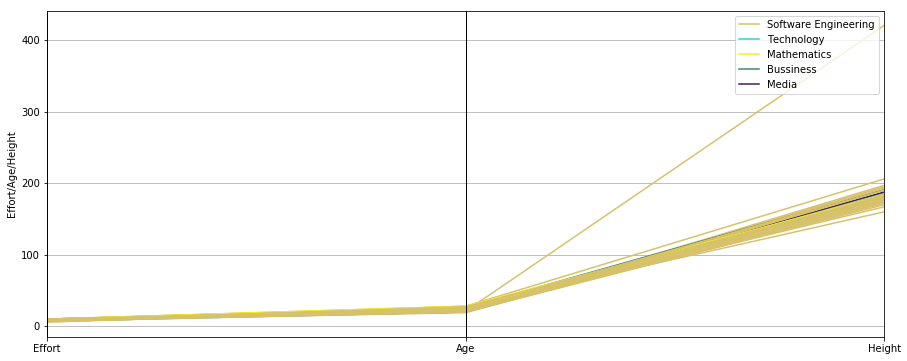

In [216]:
# Parallel coordinates
from pandas.tools.plotting import parallel_coordinates

df1 = pd.DataFrame()
df1['Study profile'] = df['Study profile']
df1['Effort'] = pd.to_numeric(df['Effort'], errors='coerce')
df1['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df1['Height'] = pd.to_numeric(df['Height'], errors='coerce')

fig = plt.figure(figsize=[15,6])
ax = parallel_coordinates(df1, 'Study profile')
ax.set_ylabel('Effort/Age/Height')
plt.show()

## More complex charts

I do not understand all graphs which roll out of this program, however, I see that this program is very useful if you're still looking for a good visualization. The Alluvial diagram for example is very pretty and gives a good indication as to what is more important.